In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

Please scroll at the graph to see the other results

[0.19204456018518518, 0.272455150462963, 0.30143287037037036, 0.23406741898148148]
('Page    ', 'Rank')
('C', '      ', 1)
('B', '      ', 2)
('D', '      ', 3)
('A', '      ', 4)


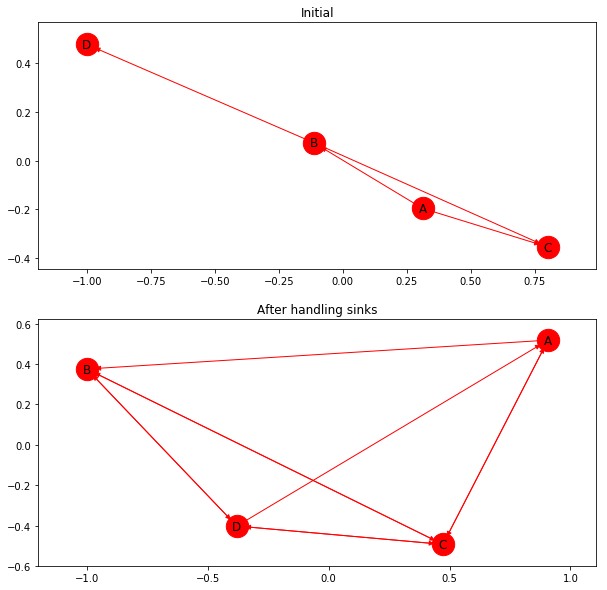

In [2]:
# need to only randomise the adj matrix
def initialiseMatrix(nodes):
	adjMatrix = [[0]*nodes]*nodes
	#print(adjMatrix)
	for i in range(0,len(adjMatrix)):
		for j in range(0,len(adjMatrix[i])):
			random.seed(time.time())
			if i!=j:

				val = random.randint(0,1)
				adjMatrix[i][j] = val
			else:
				#print(i,j)
				adjMatrix[i][j] =0
				#print(adjMatrix[i][j])
	
	''' for i in range(0,len(adjMatrix)):
		print(adjMatrix[i])
	print("")	 '''	
	return adjMatrix

def handleSinks(adjMatrix): # if a sink exists edges are made from the sink to all other nodes and sinks 
	zeroRows=[] # if a row in an adjcency matrix has all 0's then it's a sink as it has no edges outgoin to other nodes
	''' for i in range(len(adjMatrix)):
		print(adjMatrix[i])
	print("") '''
	for i in range(len(adjMatrix)):
		flag=0
		for j in range(len(adjMatrix[i])):
			if adjMatrix[i][j]!=0:
				flag=1
		if(flag==0):
			zeroRows.append(i)
	if len(zeroRows)!=0:
		for i in zeroRows:
			for j in range(len(adjMatrix[i])):
				if(i!=j):
					adjMatrix[i][j] = 1
	
	''' for i in range(len(adjMatrix)):
		print(adjMatrix[i]) '''
	
	return adjMatrix # return modified/unmodified adjecency matrix
	


def findOutNodes(adjMatrix,node): # findes the no of outgoing edges for a given node
	count=0
	for i in adjMatrix[node]:
		if(i!=0):
			count+=1
	return count 

def checkChange(array1,array2):
	flag=0
	for i in range(len(array1)):
		if abs(array1[i]-array2[i]) >= 0.010:
			flag=1
			break
	return flag

def getEdgesArray(adjMatrix):
	alphabets = ['A','B','C','D','E','F','G']
	edgesArr=[]
	for i in range(len(adjMatrix)):
		for j in range(len(adjMatrix[i])):
			if(adjMatrix[i][j]!=0):
				temp= (alphabets[i],alphabets[j])
				edgesArr.append(temp)
	return edgesArr
	
	

def plotGraph(edgesArray,edgesArrayMod):
	''' print(edgesArray)
	print(edgesArrayMod) '''
	G = nx.DiGraph()
	G1 = nx.DiGraph()

	plt.figure(figsize=(10,10))
	plt.subplot(211)
	plt.title("Initial")
	
	G.add_edges_from(
		#edgesArray
		edgesArray
		)

	val_map = {'A': 1.0,
			'D': 0.5714285714285714,
			'H': 0.0}

	values = [val_map.get(node, 0.25) for node in G.nodes()]

	# Specify the edges you want here
	#red_edges = edgesArray
	red_edges = edgesArray
	edge_colours = ['black' if not edge in red_edges else 'red'
					for edge in G.edges()]
	black_edges = [edge for edge in G.edges() if edge not in red_edges]

	# Need to create a layout when doing
	# separate calls to draw nodes and edges
	pos = nx.spring_layout(G)
	nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet')
						, node_size = 500)
	nx.draw_networkx_labels(G, pos)
	nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
	nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
	#f.show()
	#G = nx.DiGraph()

	plt.subplot(212)
	plt.title("After handling sinks")
	G1.add_edges_from(
		edgesArrayMod)

	val_map1 = {'A': 1.0,
			'D': 0.5714285714285714,
			'H': 0.0}

	values = [val_map1.get(node, 0.25) for node in G1.nodes()]

	# Specify the edges you want here
	red_edges1 = edgesArrayMod
	edge_colours = ['black' if not edge in red_edges1 else 'red'
					for edge in G.edges()]
	black_edges1 = [edge for edge in G.edges() if edge not in red_edges1]

	# Need to create a layout when doing
	# separate calls to draw nodes and edges
	pos1 = nx.spring_layout(G1)
	nx.draw_networkx_nodes(G1, pos1, cmap=plt.get_cmap('jet')
						, node_size = 500)
	nx.draw_networkx_labels(G1, pos1)
	nx.draw_networkx_edges(G1, pos1, edgelist=red_edges1, edge_color='r', arrows=True)
	nx.draw_networkx_edges(G1, pos1, edgelist=black_edges1, arrows=False)

	#input()
	


def main():
	alphabets = ['A','B','C','D','E','F','G']
	nodes = 4 # no of nodes in the graph
	adjMatrix = [[0,1,1,0] , [0,0,1,1] , [0,0,0,0] , [0,0,0,0] ] # the adjecency matrix indicating vertices
	# the below 2 lines can be uncommented to see the result for a matrix without sinks
	# please comment the above 2 line if you are uncommenting the below 2 lines
	''' nodes=5

	adjMatrix = [[0,1,0,0,0],[0,0,0,0,1],[1,1,0,1,1],[0,0,1,0,1],[0,0,0,1,0]] '''
	edgesArray= getEdgesArray(adjMatrix) # getting edges of the graph to draw 

	adjMatrix = handleSinks(adjMatrix)
	edgesArrayMod = getEdgesArray(adjMatrix)
	plotGraph(edgesArray,edgesArrayMod) # plotting the grpahs before and after sinks have been handled
	pageRanks = [1.0/nodes]*nodes # holds the previous iterations page ranks 
	pageRanksNew = [0.0]*nodes # holds the page rank produced in the current iteration
	D = 0.85
	#print(pageRanks)
	#print(pageRanks[3])
	for trials in range(0,100): # fixing the number of iterations to 100
		
		for i in range(nodes):
			currentPageSum = (1-D)/nodes # holds the updated page rank
			incoming = [] # hold the vertices coming into the node
			for j in range(nodes):
				if(adjMatrix[j][i]!=0):
					incoming.append(j)
			for inNode in incoming:
				NoOfOutNodes = findOutNodes(adjMatrix,inNode) # calculating the number of outgoing edges of the incoming node
				#print(inNode,"inNode")
				temp = pageRanks[inNode]/NoOfOutNodes 
				currentPageSum +=temp *0.85 # using the page ranke formula we update the page rank of the node/page
			#print("")
			pageRanksNew[i] = currentPageSum
		#print(trials)
		flag = checkChange(pageRanks,pageRanksNew) # function checks whether the error is less than 0.01. if it is, then it breaks from the loop
		
		if flag==0:
			#print(pageRanksNew)
			#print(trials,"iteration")
			break
		for i in range(len(pageRanks)):
			pageRanks[i] = pageRanksNew[i]

	print(pageRanks) # the final page rnaks
	tempRanks =[]# display the final rnaks of pages
	for i in pageRanks:
		tempRanks.append(i)
	tempRanks.sort()
	rank=[]
	for i in tempRanks:
		#print(i)
		rank.append(pageRanks.index(i))
	#print(rank)
	count=1
	print("Page    ","Rank")
	for i in reversed(rank):
		print(alphabets[i],"      ",count)
		count+=1
	
	plt.show()
	
	
main()
			


